# Non-linear Interpretability

The key to interpretable machine learning

1. explanation should be interpretable
2. number of explanations should be low (low entropy on possible explanations)

Assume $D = \{(x_i, y_i)\}_{i=1}^{|D|}$, then we have the following optimization function (denote $z$ as explanation)

$cost(D) = \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)$

where $x$ is the input, $y$ is the output, $L$ is the data loss function, and $\mathcal{H}(z)$ is entropy and $\alpha>0$ is tradeoff parameter

Based on this design guideline, we propose the following generalized linear interpretable model:

![model_pipeline](presentations/unifiying_view_credibility.png )

The model has two components, the switch network (parametrized by $\theta_s$ and output explanation probability $p(z|x)$) and the weight network (parametrized by $\theta_w$ and output parameters of an interpretable model f). 

Assuming the switch network and the function network are differentiable, we can derive the update gradient for $\theta_s$ and $\theta_w$.

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_s} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{x,y,z} p(x,y,z) L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{x,y,z} p(x) p(y|x) p(z|x,y) L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{x,y,z} p(x,y) p(z|x) L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \sum_{z} L(x, y, z) \frac{ \partial p(z|x)}{\partial \theta_s} + \alpha  \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} + \alpha \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \frac{\partial \sum_{z} p(z) \log p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) \frac{\partial p(z)}{\partial \theta_s} + p(z) \frac{\partial \log p(z)}{\partial \theta_s}) \\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y,z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y)p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \sum_{x,y} p(x,y) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{x,y} p(x,y) \sum_{z} (\log p(z) + 1) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \mathbb{E}_{x,y} \sum_{z} (\log p(z) + 1) \frac{\partial p(z|x)}{\partial \theta_s} \frac{p(z|x)}{p(z|x)}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \mathbb{E}_{x,y} \mathbb{E}_{z|x} (\log p(z) + 1) \frac{\partial \log p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y}\mathbb{E}_{z|x} (L(x, y, z) - \alpha \log p(z) - \alpha) \frac{\partial \log p(z|x)}{\partial \theta_s}
\end{align}

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_w} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_w}\\
&= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z)}{\partial \theta_w}\\
&= \mathbb{E}_{x,y,z} \frac{\partial L(x, y, z)}{\partial \theta_w}
\end{align}

## design choices

For simplicty, we only consider a line as the output of the weight network. We could try other atomic structures such as  circle 

We consider 3 variant  of the switch network (assuming $z \in \mathbb{R}^K$)

1. the last layer of the switch network is a softmax ($z$ being a one hot vector)
2. the last layer of the switch network is multiple sigmoid functions ($p(z|x) = \Pi_{k=1}^K p(z_k|x)$)
3. the switch network is implemented by an rnn ($p(z|x) = \Pi_{k=1}^K p(z_k|x,z_{1:k-1})$)

Obviously, variant 3 is the most general because it computes the full probability while variant 2 assumes digits of z  are independently generated given the input. Variant 1 is also general but it can only hold $K$ explanations, whereas the other two can hold $2^K$ number of explanations so that they are more memory efficient.

We consider the following environment to run our experiment

- Triangle world (to test a world where only 3 line suffices)
- Egg world (to test a world where potentially infinite lines are needed)
- Island in the sea (to fail input gradient)
- Big and small islands (to fail counterfactual explanation)
- Randomly many islands (to get intuition on the model)


## triangle world

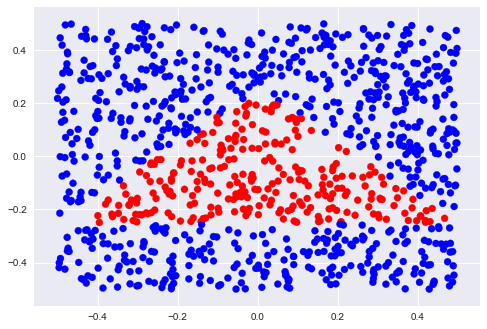

In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn as sns

def build_triangle(n=10):  
    X = np.random.rand(n, 2)-0.5
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[1,1,-0.25], [-1, 1, -0.25], [0, -1, -0.25]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_triangle(n)
plotData(X, Y)

0.12% (0m 0s) 0.0007


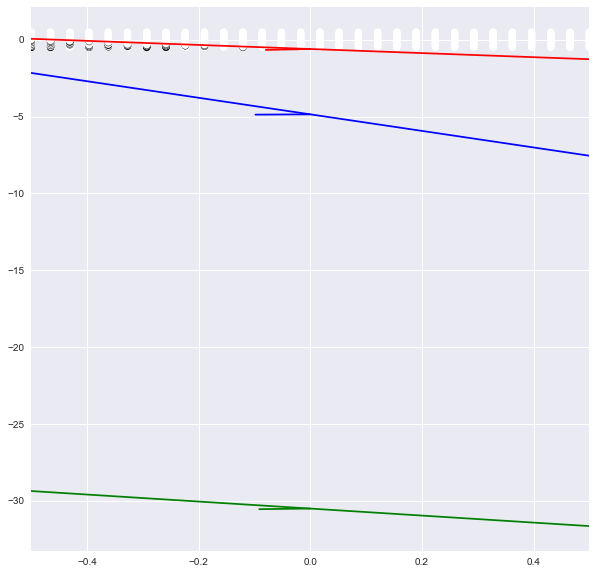

probability of choosing 0 is 0.357777777778
probability of choosing 1 is 0.642222222222
probability of choosing 2 is 0.0
12.62% (0m 9s) 0.0004


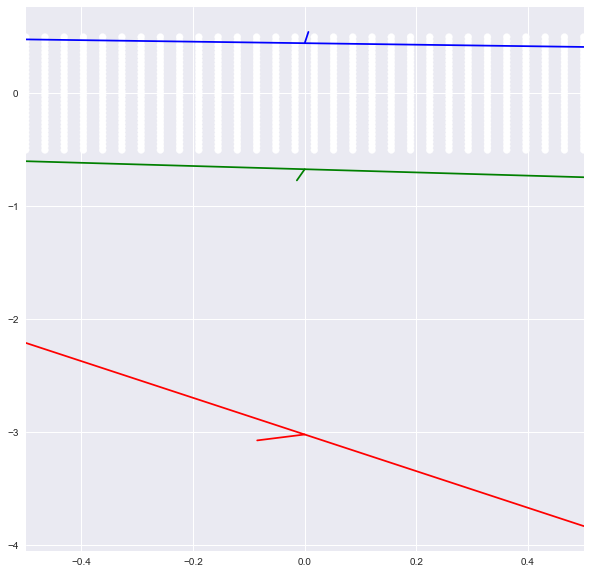

probability of choosing 0 is 0.0
probability of choosing 1 is 0.423333333333
probability of choosing 2 is 0.576666666667
25.12% (0m 18s) 0.0001


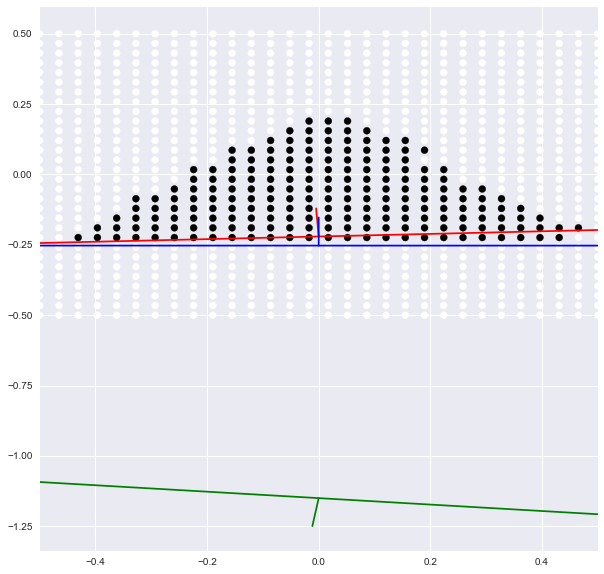

probability of choosing 0 is 0.0
probability of choosing 1 is 0.508888888889
probability of choosing 2 is 0.491111111111
37.62% (0m 27s) 0.0001


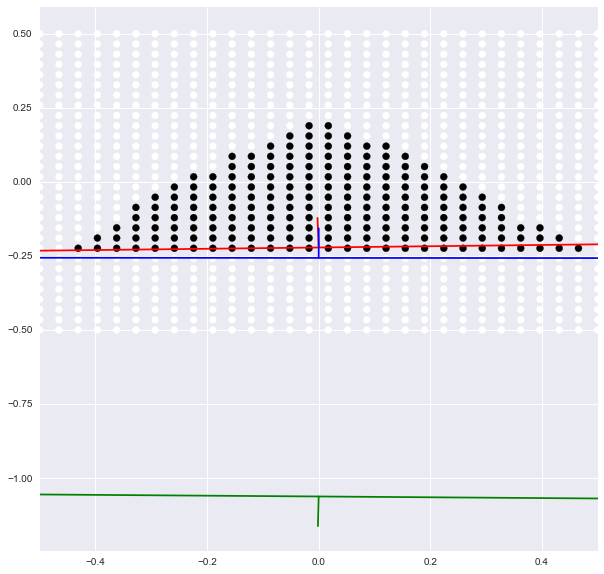

probability of choosing 0 is 0.0
probability of choosing 1 is 0.511111111111
probability of choosing 2 is 0.488888888889
50.12% (0m 35s) 0.0000


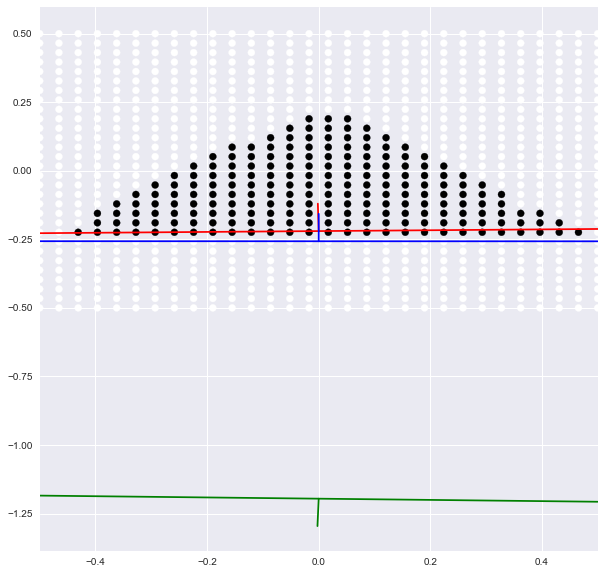

probability of choosing 0 is 0.0
probability of choosing 1 is 0.512222222222
probability of choosing 2 is 0.487777777778
62.62% (0m 45s) 0.0000


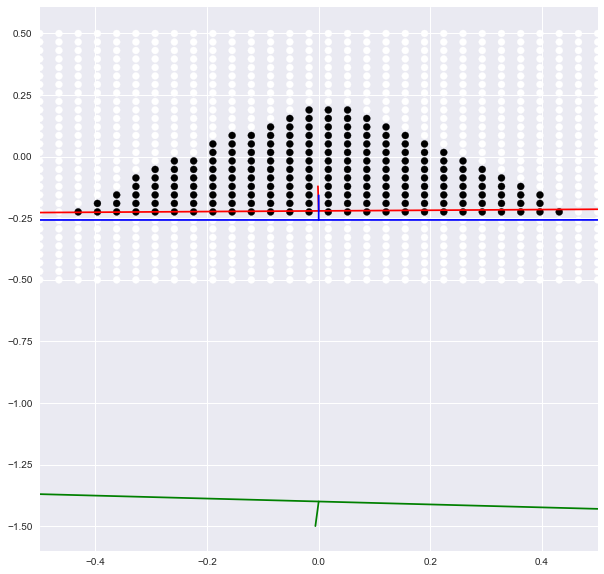

probability of choosing 0 is 0.0
probability of choosing 1 is 0.513333333333
probability of choosing 2 is 0.486666666667
75.12% (0m 54s) 0.0000


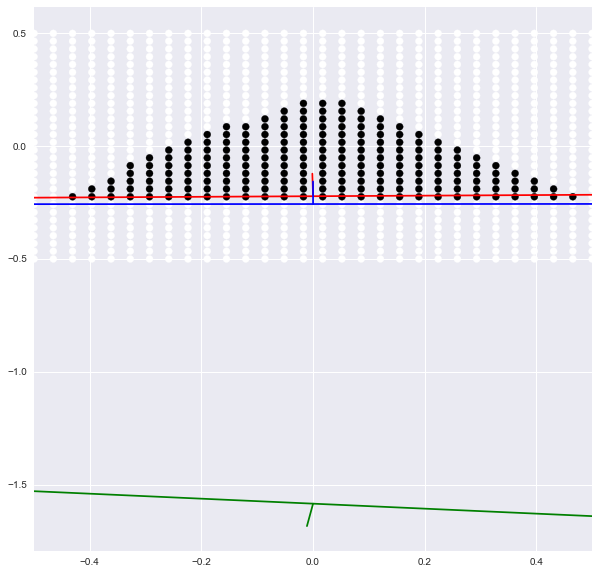

probability of choosing 0 is 0.0
probability of choosing 1 is 0.513333333333
probability of choosing 2 is 0.486666666667


/Users/jiaxuan/research/deep-eye/credible_learning/lib/train.py:164: RuntimeWarning: invalid value encountered in less
  z_index = [np.random.choice(self.switch_size, p=prob[i]) for i in range(n)]


87.62% (1m 3s) nan


/Users/jiaxuan/research/deep-eye/credible_learning/lib/utility.py:168: RuntimeWarning: invalid value encountered in greater
  Z = (Z > 0).astype(np.int)


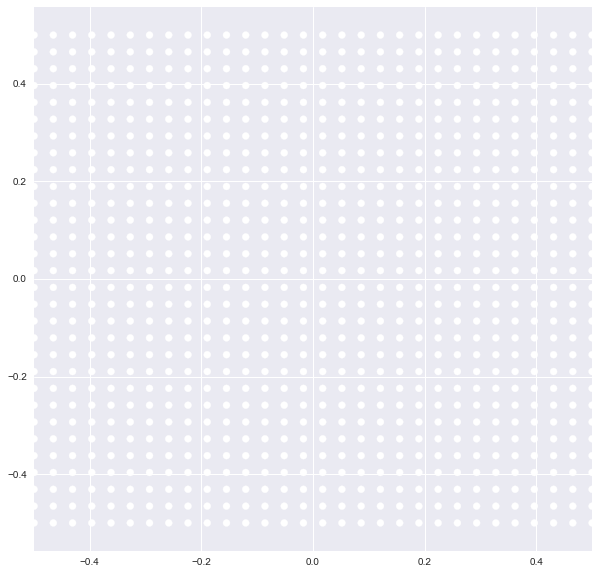

probability of choosing 0 is 1.0
probability of choosing 1 is 0.0
probability of choosing 2 is 0.0


[0.0006932016015052796,
 0.0004308348596096039,
 0.00012561337649822236,
 5.457006767392158e-05,
 4.2369108647108075e-05,
 3.511346504092217e-05,
 2.5710240006446838e-05,
 nan]

In [37]:
from lib.train import InterpretableTrainer
from torch.utils.data import Dataset, DataLoader, TensorDataset
from lib.model import Switch, Weight, apply_linear
from lib.utility import logit_elementwise_loss


input_size = 2 # 2d input
switch_size = 3 # can only output 3 lines

x = Variable(torch.from_numpy(X)).float()
y = Variable(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

t =  InterpretableTrainer(switch, weight, apply_linear, alpha=0)

# todo fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=1000, shuffle=True)
t.fit(data, n_epochs=800, print_every=100)


/Users/jiaxuan/research/deep-eye/credible_learning/lib/train.py:164: RuntimeWarning: invalid value encountered in less
  z_index = [np.random.choice(self.switch_size, p=prob[i]) for i in range(n)]
/Users/jiaxuan/research/deep-eye/credible_learning/lib/utility.py:168: RuntimeWarning: invalid value encountered in greater
  Z = (Z > 0).astype(np.int)


[[nan, nan, nan], [nan, nan, nan], [nan, nan, nan]]


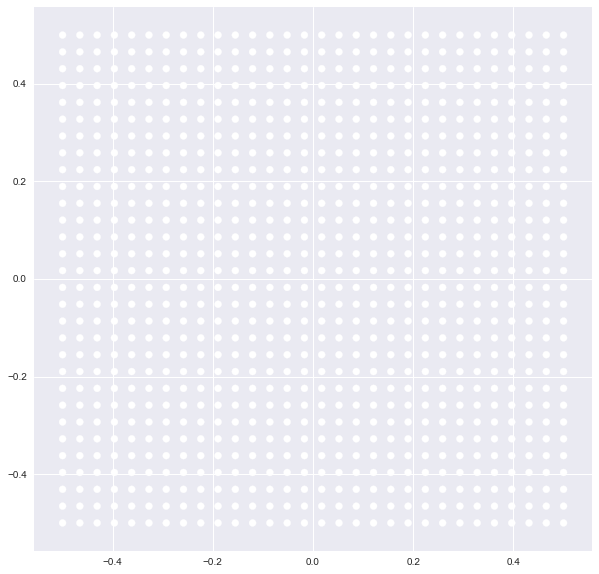

In [35]:
from lib.utility import plotDecisionSurface
plt.figure(figsize=(10,10))

plotDecisionSurface(t.forward, -0.5, 0.5, -0.5, 0.5)
#plt.xlim([-0.5, 0.5])
#plt.ylim([-0.5, 0.5])

colors = ['r','g','b','k','purple']
#lines = [[1,1,-0.25], [-1, 1, -0.25], [0, -1, -0.25]]
lines = weight.explain()[-3:]
print(lines)
for i, (t1, t2, b) in enumerate(lines):
    # t1 x + t2 y + b = 0
    # y = - (t1 x + b) / t2
    def l(x):
        return - (t1 * x + b) / t2

#     a = np.array([-0.5, l(-0.5)])
#     b = np.array([0.5, l(0.5)])
#     print((b-a).dot(np.array([t1,t2])))

    plt.plot([-0.5, 0.5], [l(-0.5), l(0.5)], c=colors[i])
    #print(t1, t2)
    plt.plot([0, 0+t1], [l(0), l(0)+t2], c=colors[i])
    #plt.plot([0, t1], [0, t2], c=colors[i])
plt.show()

In [33]:
output = switch(x).data.numpy()
choices = output.argmax(1)
for i in range(3):
    print('probability of choosing', i, 'is', (choices == i).sum() / len(choices))

probability of choosing 0 is 0.75
probability of choosing 1 is 0.0
probability of choosing 2 is 0.25


In [37]:
# model forward pass
from lib.model import Switch, Weight, apply_linear
from lib.utility import logit_elementwise_loss

input_size = 2 # 2d input
switch_size = 3 # can only output 3 lines

x = Variable(torch.from_numpy(X)).float()
y = Variable(torch.from_numpy(Y)).float()

# determine which line to use
switch = Switch(input_size, switch_size)
prob = switch(x).data.numpy()

# sample the used line
z_index = [np.random.choice(switch_size, p=prob[i]) for i in range(n)]
z = np.zeros((n, switch_size))
z[np.arange(n), z_index] = 1

# form an explanation
weight = Weight(switch_size, input_size+1) # +1 for b in linear model
f = weight(Variable(torch.from_numpy(z)).float())

# apply f on x
o = apply_linear(f, x)

# compute loss
logit_loss = nn.SoftMarginLoss()
print(logit_loss(o, y))

print(logit_elementwise_loss(o, y).sum() / n)

Variable containing:
 0.7233
[torch.FloatTensor of size 1]

Variable containing:
 0.7233
[torch.FloatTensor of size 1]



In [123]:
from lib.train import InterpretableTrainer

input_size = 2 # 2d input
switch_size = 3 # can only output 3 lines

x = Variable(torch.from_numpy(X)).float()
y = Variable(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

t =  InterpretableTrainer(switch, weight, apply_linear)
o = t.forward(x)

l = t.loss(o, y)
l

Variable containing:
 0.6915
[torch.FloatTensor of size 1]

In [128]:
t.backward(x, y, sample=False)

In [66]:
weight.explain()

[[0.3525789678096771, -0.14321190118789673, 0.4203466773033142],
 [0.17685800790786743, -0.1637973189353943, 0.13478517532348633],
 [0.01801331341266632, -0.6834176778793335, 0.4041174650192261]]

In [87]:
a = Variable(torch.from_numpy(np.array([1,2])), requires_grad=True)
b = Variable(torch.from_numpy(np.array([3,4])), requires_grad=True)
d = (a + b).sum()
c = (a + b).sum() * Variable(d.data, requires_grad=False)
c.backward()
a.grad

Variable containing:
 10
 10
[torch.LongTensor of size 2]